In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_contribution_map(commit_data):
    commit_data['weekday'] = commit_data['date'].dt.weekday
    commit_data['week_number'] = commit_data['date'].dt.isocalendar().week
    commit_data['month'] = commit_data['date'].dt.month

    pivot_data = commit_data.pivot_table(index='weekday', columns='week_number', values='commits', aggfunc='sum', fill_value=0)

    fig, ax = plt.subplots(figsize=(12, 8))
    cmap = plt.get_cmap('Greens')
    cax = ax.matshow(pivot_data, cmap=cmap, aspect='equal')  # Set aspect to 'equal'

    ax.set_xticks(np.arange(len(pivot_data.columns)))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

    ax.set_title('Git Contribution Map')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.tick_bottom()
    ax.tick_params(axis='both', which='both', length=0)
    
    total_commits = commit_data['commits'].sum()
    ax.text(0.5, -0.3, f'Total Commits: {total_commits}', transform=ax.transAxes, ha='center', va='center')

    plt.show()

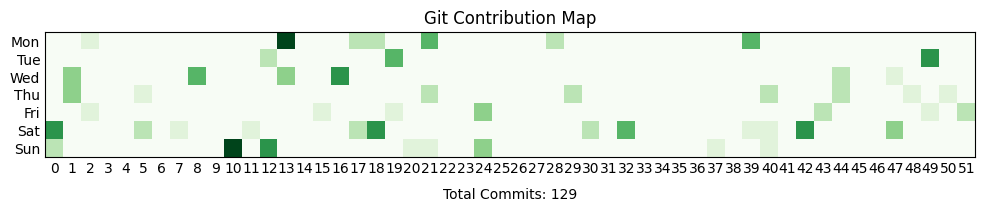

In [229]:
import numpy as np
import pandas as pd

def generate_commit_data(start_date, end_date, max_commits, freq=1.0):
    dates = pd.date_range(start=start_date, end=end_date)
    
    commit_data = [np.random.randint(0, np.random.randint(1, max_commits)) if np.random.rand() < freq else 0 for _ in range(len(dates))]

    return pd.DataFrame({'date': dates, 'commits': commit_data})

# Example usage:
df = generate_commit_data('2023-01-01', '2023-12-31', 10, 0.2)
plot_contribution_map(df)